# Project 2 - Healthcare

Problem Statement

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.

Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 

Variables	                Description

Pregnancies	                Number of times pregnant
Glucose	                    Plasma glucose concentration in an oral glucose tolerance test
BloodPressure	            Diastolic blood pressure (mm Hg)
SkinThickness	            Triceps skinfold thickness (mm)
Insulin	                    Two hour serum insulin
BMI	                        Body Mass Index
DiabetesPedigreeFunction	Diabetes pedigree function
Age	                        Age in years
Outcome	                    Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

Project Task: Week 1

Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

Project Task: Week 2

Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

Project Task: Week 3

Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

Project Task: Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

Week 1 - Data Exploration

In [2]:
dataset = pd.read_csv('health care diabetes.csv')

In [3]:
dataset.shape

(768, 9)

In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data= dataset[dataset['Insulin'] != 0]

In [10]:
data.shape

(394, 9)

In [11]:
data1= data[data['BMI'] != 0]

In [12]:
data1.shape

(393, 9)

In [13]:
dataset2= data1[data1['Glucose'] != 0]

In [14]:
dataset2.shape

(392, 9)

In [15]:
dataset2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,392.0,3.301020,3.211424,0.000,1.00000,2.0000,5.000,17.00
Glucose,392.0,122.627551,30.860781,56.000,99.00000,119.0000,143.000,198.00
BloodPressure,392.0,70.663265,12.496092,24.000,62.00000,70.0000,78.000,110.00
SkinThickness,392.0,29.145408,10.516424,7.000,21.00000,29.0000,37.000,63.00
Insulin,392.0,156.056122,118.841690,14.000,76.75000,125.5000,190.000,846.00
BMI,392.0,33.086224,7.027659,18.200,28.40000,33.2000,37.100,67.10
DiabetesPedigreeFunction,392.0,0.523046,0.345488,0.085,0.26975,0.4495,0.687,2.42
Age,392.0,30.864796,10.200777,21.000,23.00000,27.0000,36.000,81.00
Outcome,392.0,0.331633,0.471401,0.000,0.00000,0.0000,1.000,1.00


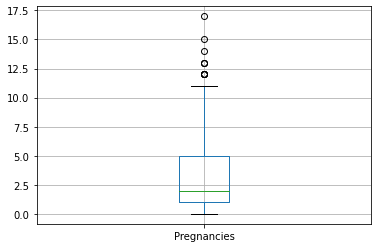

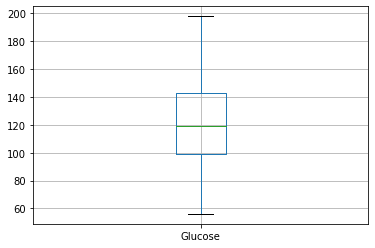

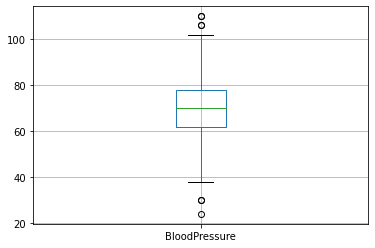

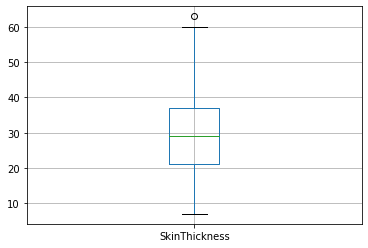

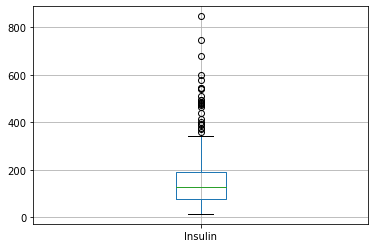

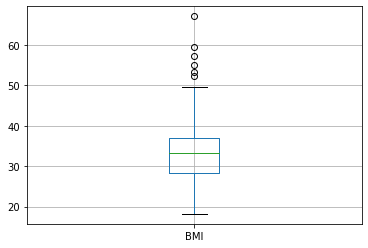

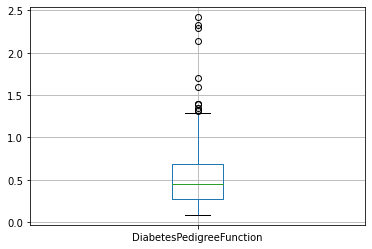

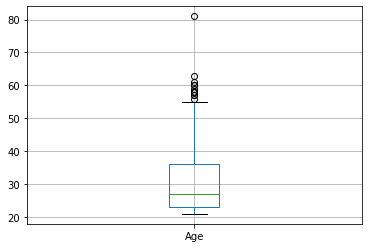

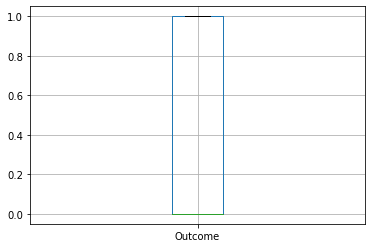

In [16]:
for column in dataset2:
    plt.figure()
    dataset2.boxplot([column])

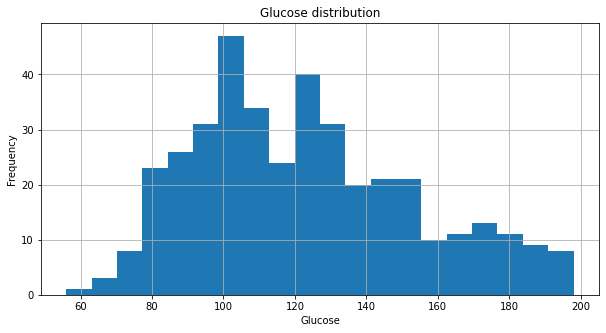

In [17]:
plt.figure(figsize=(10,5))
dataset2['Glucose'].hist(bins=20)
plt.title('Glucose distribution')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

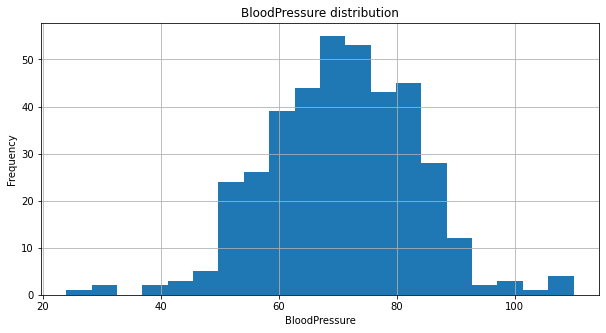

In [18]:
plt.figure(figsize=(10,5))
dataset2['BloodPressure'].hist(bins=20)
plt.title('BloodPressure distribution')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.show()

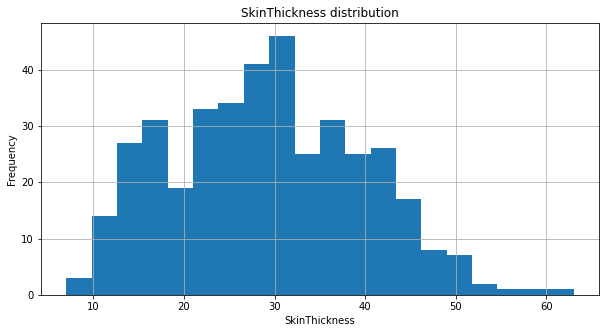

In [19]:
plt.figure(figsize=(10,5))
dataset2['SkinThickness'].hist(bins=20)
plt.title('SkinThickness distribution')
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.show()

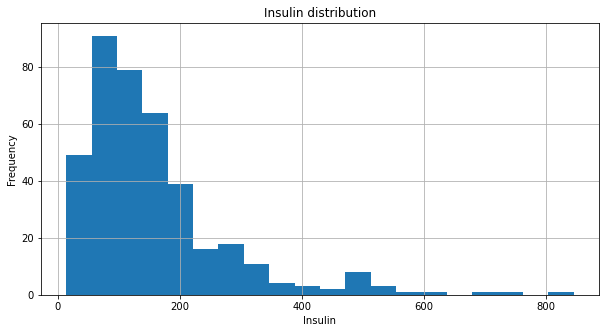

In [20]:
plt.figure(figsize=(10,5))
dataset2['Insulin'].hist(bins=20)
plt.title('Insulin distribution')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

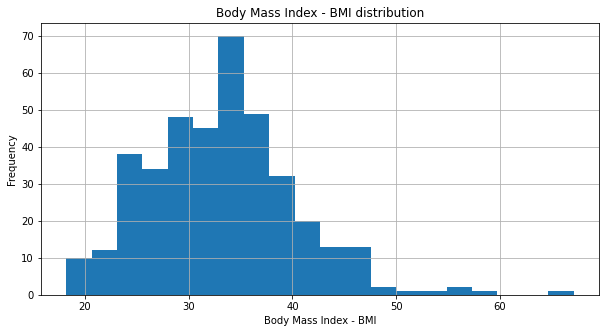

In [21]:
plt.figure(figsize=(10,5))
dataset2['BMI'].hist(bins=20)
plt.title('Body Mass Index - BMI distribution')
plt.xlabel('Body Mass Index - BMI')
plt.ylabel('Frequency')
plt.show()

In [22]:
dataset2['Glucose'].value_counts()

100    14
99     10
129     9
95      8
88      8
       ..
164     1
166     1
168     1
169     1
198     1
Name: Glucose, Length: 117, dtype: int64

In [23]:
dataset2['BloodPressure'].value_counts()

70     31
74     30
64     27
68     24
78     23
72     23
60     20
76     20
62     19
58     18
82     17
80     17
88     15
66     15
84     11
86     11
90     11
50     10
54      8
56      8
52      6
44      3
48      3
94      2
100     2
106     2
110     2
85      2
30      2
65      2
46      2
92      1
98      1
40      1
102     1
38      1
24      1
Name: BloodPressure, dtype: int64

In [24]:
dataset2['SkinThickness'].value_counts()

32    20
30    18
33    17
18    16
23    16
27    14
26    14
29    14
28    13
19    12
39    12
41    12
25    12
15    11
37    11
35    11
13    10
17    10
40    10
42     9
22     9
36     9
24     8
31     8
34     8
21     8
46     7
20     7
12     6
45     6
14     6
43     5
16     5
11     5
47     4
48     4
44     4
10     3
38     3
50     3
49     3
52     2
7      2
51     1
8      1
56     1
60     1
63     1
Name: SkinThickness, dtype: int64

In [25]:
dataset2['Insulin'].value_counts()

105    11
130     9
140     9
120     8
100     7
       ..
112     1
108     1
680     1
91      1
510     1
Name: Insulin, Length: 184, dtype: int64

In [26]:
dataset2['BMI'].value_counts()

33.3    7
32.0    7
31.6    6
35.5    5
33.6    5
       ..
23.8    1
25.8    1
29.6    1
23.9    1
29.8    1
Name: BMI, Length: 194, dtype: int64

Week 2 - Data Exploration

In [27]:
df_glucose = dataset2['Glucose'].value_counts().to_frame()

In [28]:
df_glucose.head()

,Glucose
100,14
99,10
129,9
95,8
88,8


In [29]:
df_glucose.shape

(117, 1)

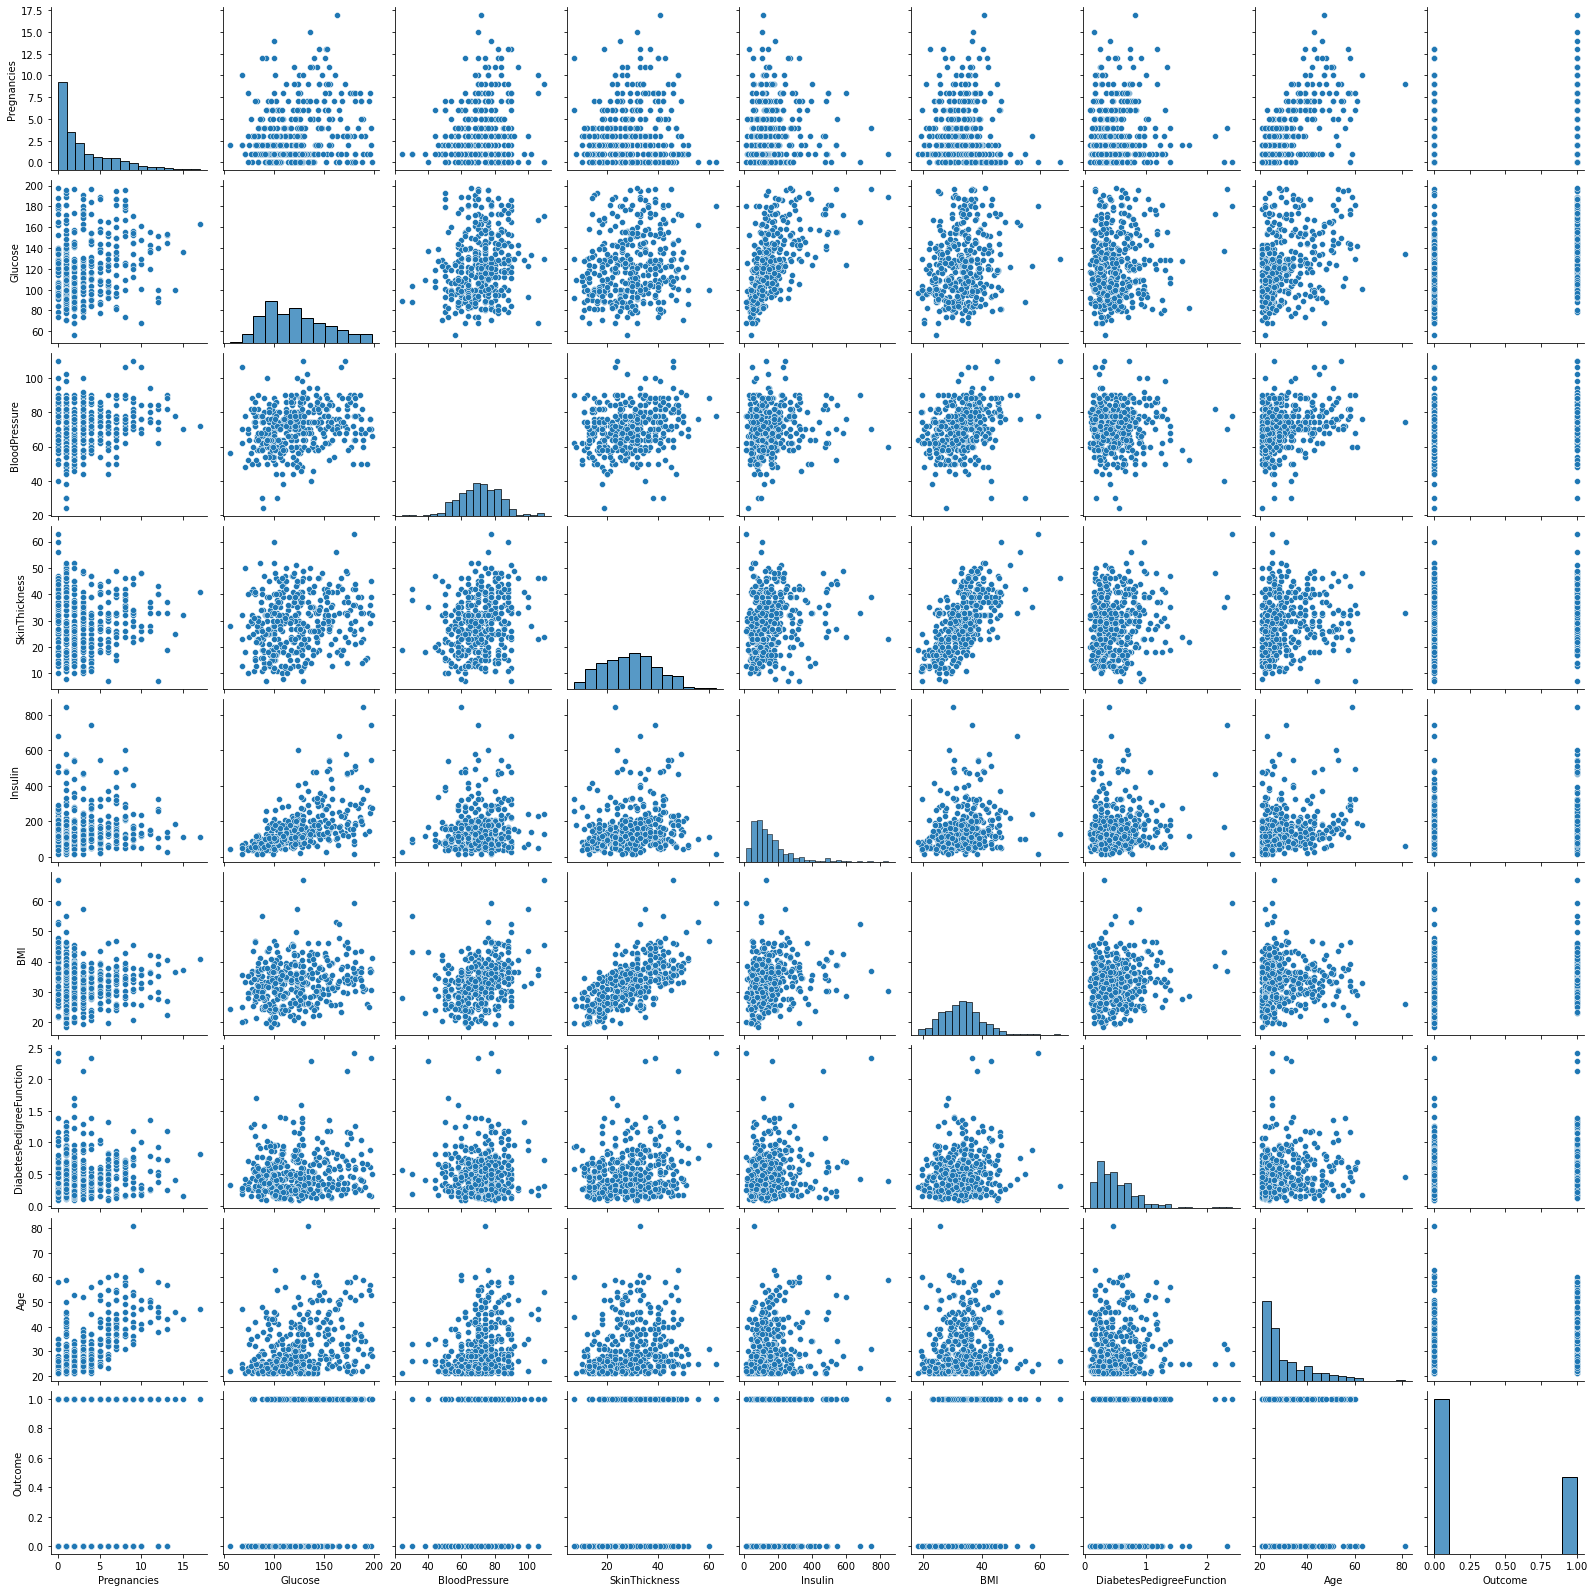

In [30]:
sns.pairplot(dataset2)

Text(0, 0.5, 'Count')

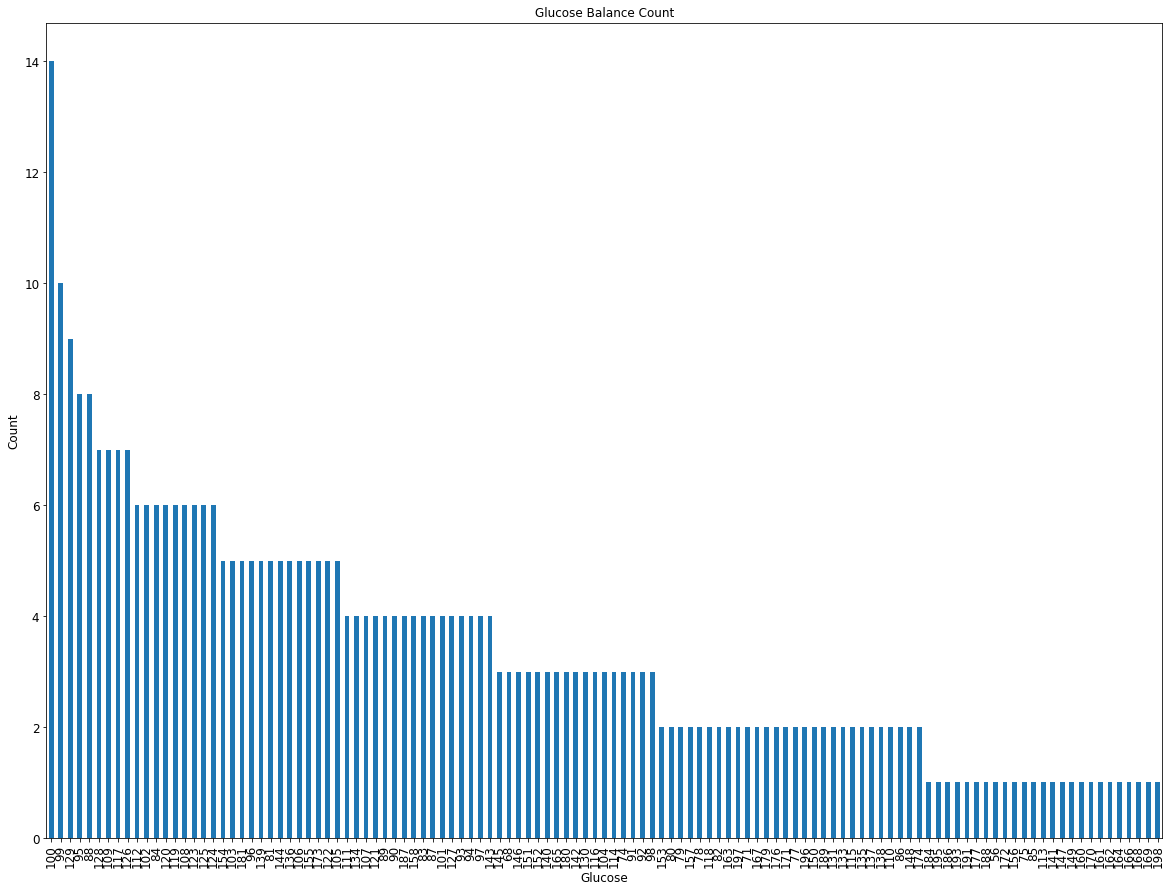

In [31]:
ax = df_glucose.plot(kind='bar', title ="Glucose Balance Count",figsize=(20,15),legend=False, fontsize=12)
ax.set_xlabel("Glucose",fontsize=12)
ax.set_ylabel("Count",fontsize=12)

In [32]:
df_bloodpressure = dataset2['BloodPressure'].value_counts().to_frame()

Text(0, 0.5, 'Count')

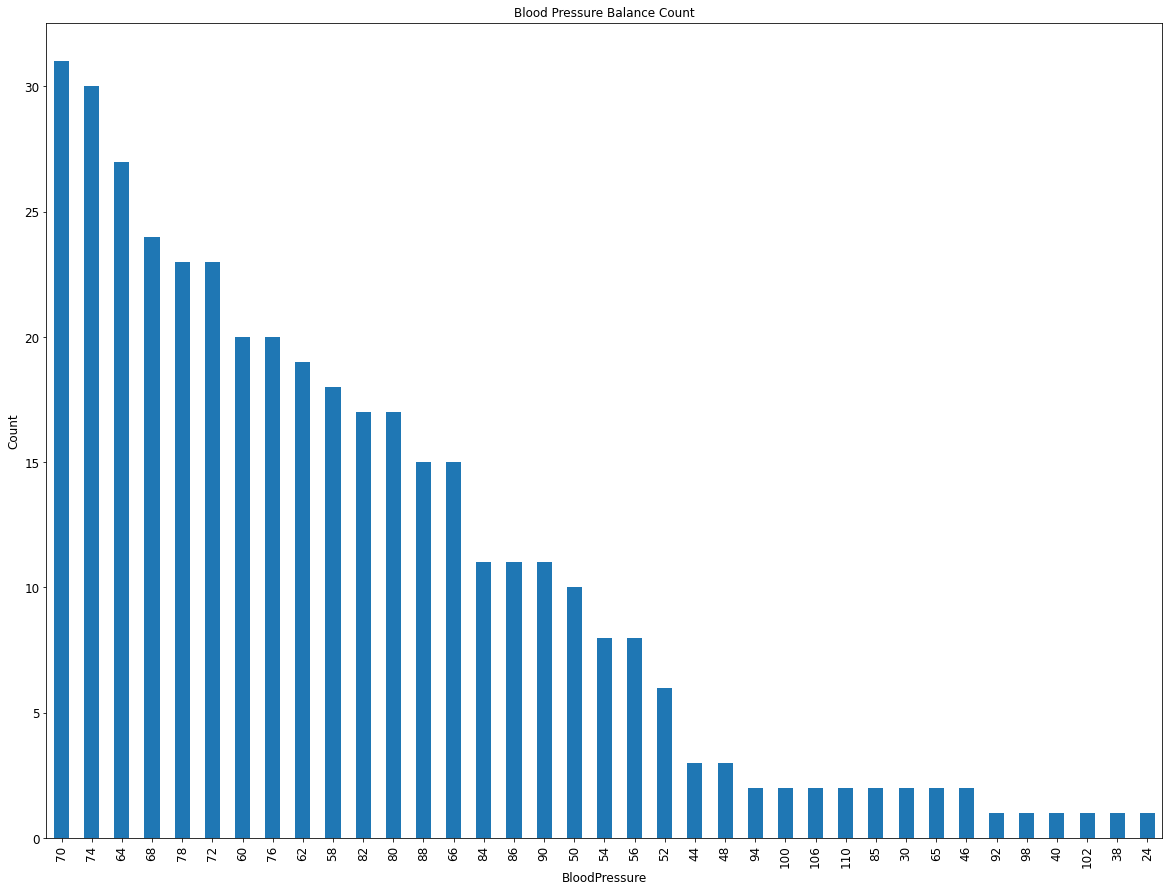

In [33]:
ax = df_bloodpressure.plot(kind='bar', title ="Blood Pressure Balance Count",figsize=(20,15),legend=False, fontsize=12)
ax.set_xlabel("BloodPressure",fontsize=12)
ax.set_ylabel("Count",fontsize=12)

Text(0, 0.5, 'Count')

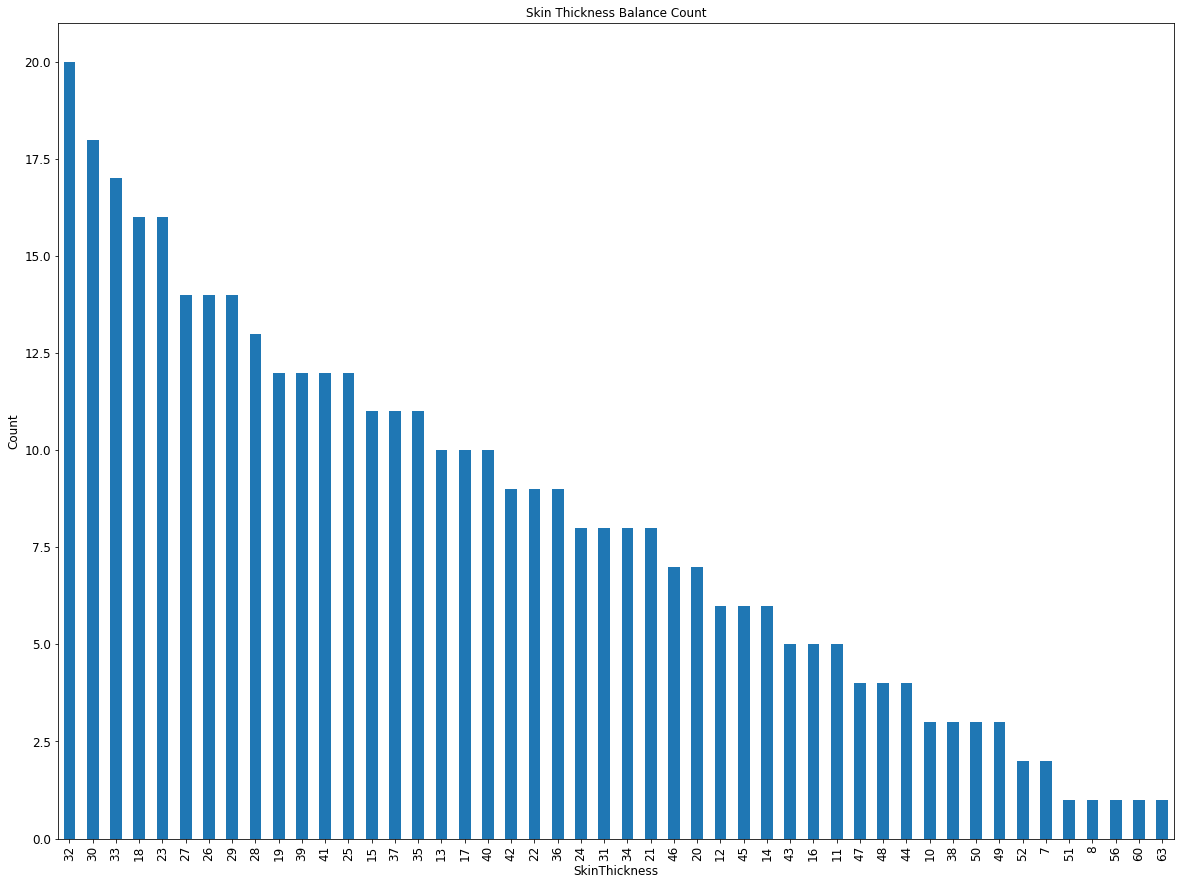

In [34]:
df_SkinThickness = dataset2['SkinThickness'].value_counts().to_frame()
ax = df_SkinThickness.plot(kind='bar', title ="Skin Thickness Balance Count",figsize=(20,15),legend=False, fontsize=12)
ax.set_xlabel("SkinThickness",fontsize=12)
ax.set_ylabel("Count",fontsize=12)

Text(0, 0.5, 'Count')

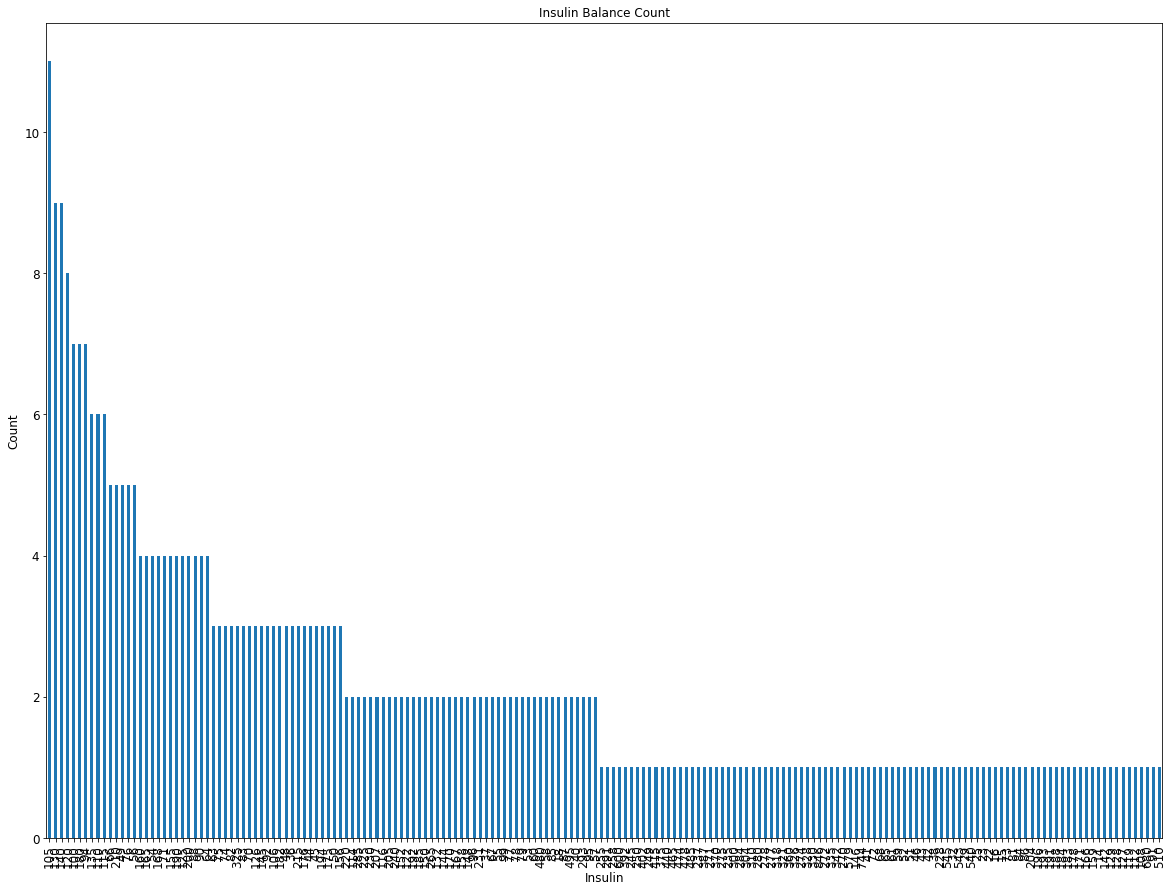

In [35]:
df_insulin = dataset2['Insulin'].value_counts().to_frame()
ax = df_insulin.plot(kind='bar', title ="Insulin Balance Count",figsize=(20,15),legend=False, fontsize=12)
ax.set_xlabel("Insulin",fontsize=12)
ax.set_ylabel("Count",fontsize=12)

Text(0, 0.5, 'Count')

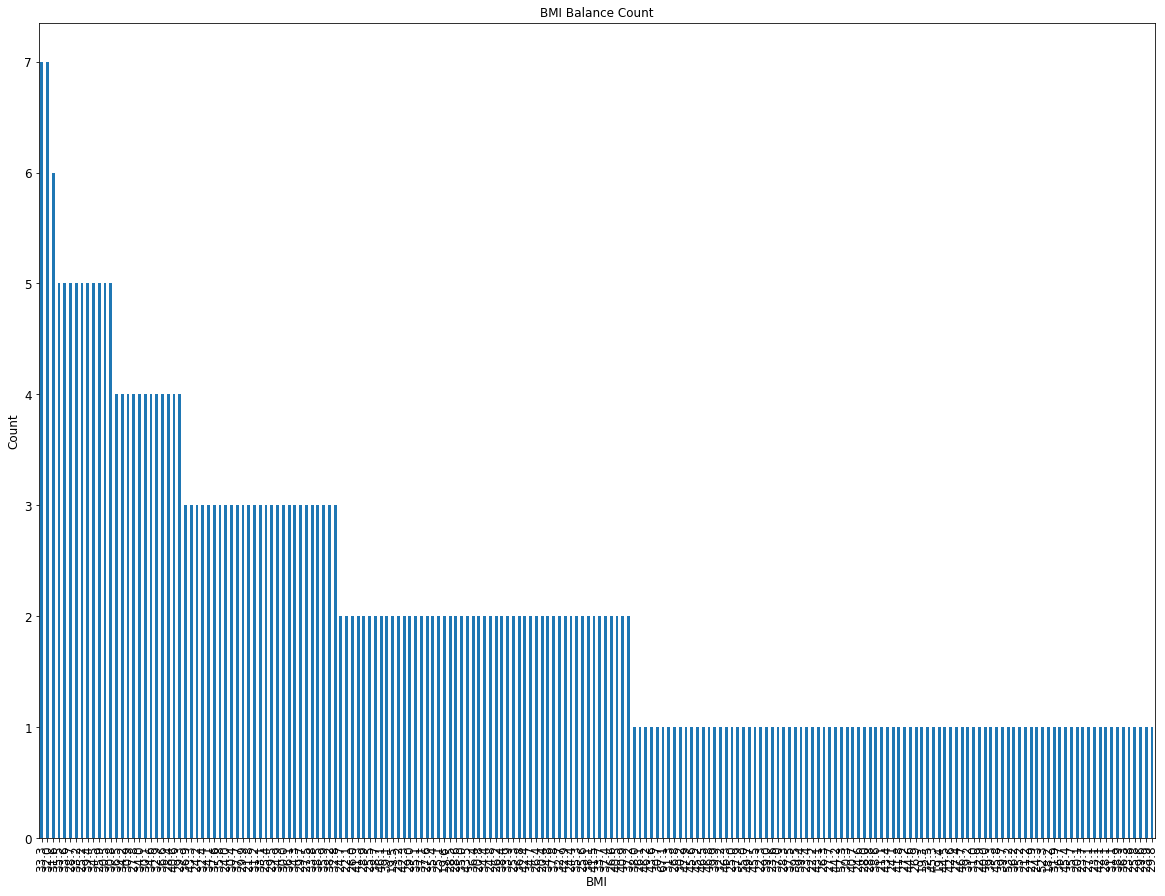

In [36]:
df_bmi = dataset2['BMI'].value_counts().to_frame()
ax = df_bmi.plot(kind='bar', title ="BMI Balance Count",figsize=(20,15),legend=False, fontsize=12)
ax.set_xlabel("BMI",fontsize=12)
ax.set_ylabel("Count",fontsize=12)

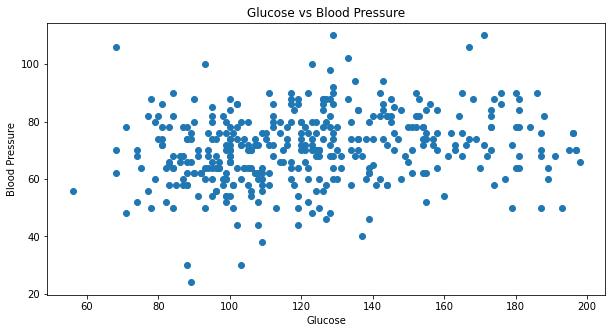

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(dataset2.Glucose,dataset2.BloodPressure)
plt.title('Glucose vs Blood Pressure')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.show()

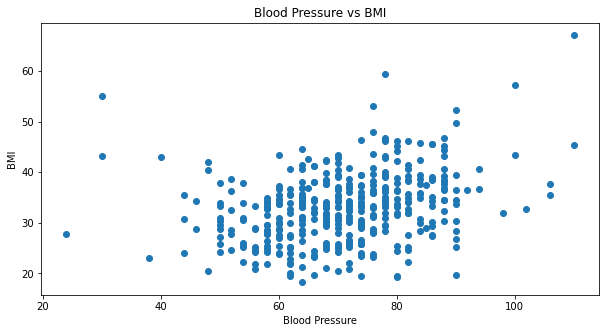

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(dataset2.BloodPressure,dataset2.BMI)
plt.title('Blood Pressure vs BMI')
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')
plt.show()

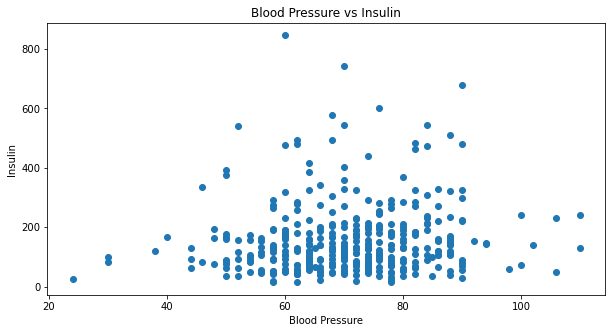

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(dataset2.BloodPressure,dataset2.Insulin)
plt.title('Blood Pressure vs Insulin')
plt.xlabel('Blood Pressure')
plt.ylabel('Insulin')
plt.show()

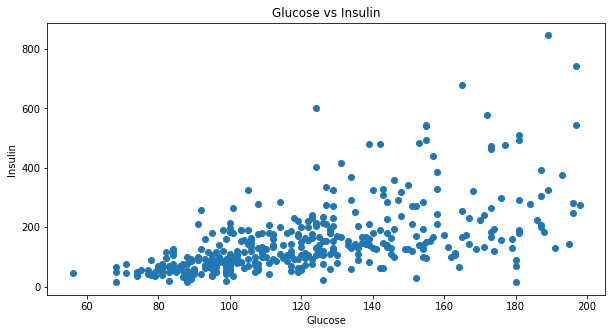

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(dataset2.Glucose,dataset2.Insulin)
plt.title('Glucose vs Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

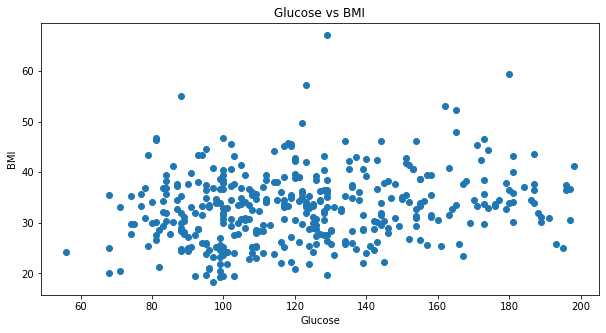

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(dataset2.Glucose,dataset2.BMI)
plt.title('Glucose vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

<AxesSubplot:>

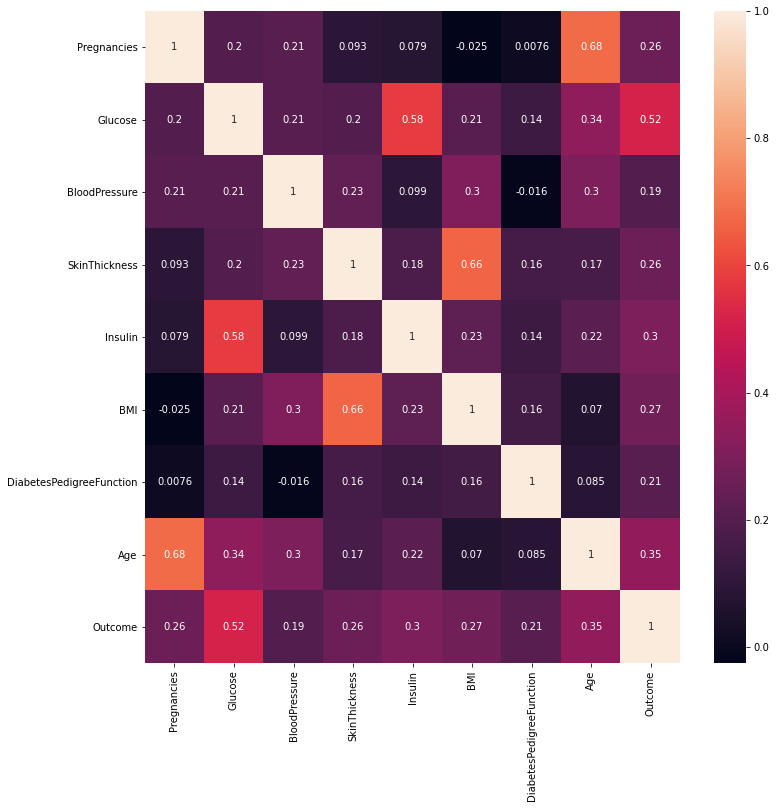

In [42]:
plt.subplots(figsize=(12,12))
sns.heatmap(dataset2.corr(),annot=True)

In [43]:
dataset2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


In [44]:
dataset2.to_excel('dataset2.xls')

C:\Users\ChipRyan\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


Week 3 - Data Modeling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [46]:
features = dataset2.iloc[:,[0,1,2,3,4,5,6,7]].values
label = dataset2.iloc[:,8].values

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(features,label,train_size=0.8,random_state =40)

In [48]:
modelLR = LogisticRegression()
modelLR.fit(X_train,Y_train)

LogisticRegression()

In [49]:
confmatrix = confusion_matrix(label,modelLR.predict(features))
confmatrix

array([[231,  31],
       [ 55,  75]], dtype=int64)

In [50]:
modelLR.score(X_train,Y_train)

0.7763578274760383

In [51]:
modelLR.score(X_test,Y_test)

0.7974683544303798

In [52]:
print(classification_report(label,modelLR.predict(features)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       262
           1       0.71      0.58      0.64       130

    accuracy                           0.78       392
   macro avg       0.76      0.73      0.74       392
weighted avg       0.77      0.78      0.77       392



AUC: 0.845


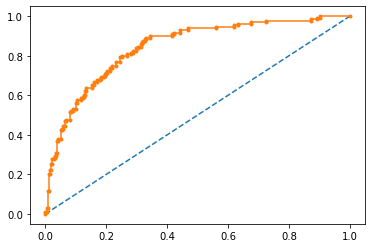

In [53]:
probs = modelLR.predict_proba(features)
probs = probs[:, 1]
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(label, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

In [54]:
modelDTC = DecisionTreeClassifier(max_depth=5)
modelDTC.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [55]:
confmatrix1 = confusion_matrix(label,modelDTC.predict(features))
confmatrix1

array([[235,  27],
       [ 23, 107]], dtype=int64)

In [56]:
modelDTC.score(X_train,Y_train)

0.9137380191693291

In [57]:
modelDTC.score(X_test,Y_test)

0.7088607594936709

In [58]:
print(classification_report(label,modelDTC.predict(features)))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       262
           1       0.80      0.82      0.81       130

    accuracy                           0.87       392
   macro avg       0.85      0.86      0.86       392
weighted avg       0.87      0.87      0.87       392



AUC: 0.921


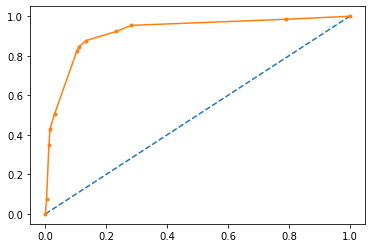

In [59]:
probs1 = modelDTC.predict_proba(features)
probs1 = probs1[:, 1]
auc = roc_auc_score(label, probs1)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(label, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

In [60]:
modelRFC = RandomForestClassifier(n_estimators=11)
modelRFC.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=11)

In [61]:
confmatrix2 = confusion_matrix(label,modelRFC.predict(features))
confmatrix2

array([[249,  13],
       [ 14, 116]], dtype=int64)

In [62]:
modelRFC.score(X_train,Y_train)

0.9680511182108626

In [63]:
modelRFC.score(X_test,Y_test)

0.7848101265822784

In [64]:
print(classification_report(label,modelRFC.predict(features)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       262
           1       0.90      0.89      0.90       130

    accuracy                           0.93       392
   macro avg       0.92      0.92      0.92       392
weighted avg       0.93      0.93      0.93       392



AUC: 0.976


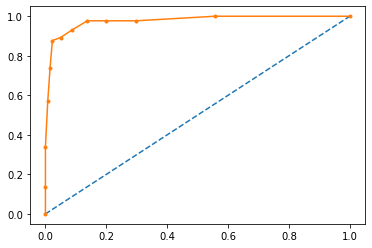

In [65]:
probs2 = modelRFC.predict_proba(features)
probs2 = probs2[:, 1]
auc = roc_auc_score(label, probs2)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(label, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

In [66]:
modelSVC = SVC(gamma='auto')
modelSVC.fit(X_train,Y_train)

SVC(gamma='auto')

In [67]:
confmatrix3 = confusion_matrix(label,modelSVC.predict(features))
confmatrix3

array([[262,   0],
       [ 25, 105]], dtype=int64)

In [68]:
modelSVC.score(X_train,Y_train)

1.0

In [69]:
modelSVC.score(X_test,Y_test)

0.6835443037974683

In [70]:
print(classification_report(label,modelSVC.predict(features)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       262
           1       1.00      0.81      0.89       130

    accuracy                           0.94       392
   macro avg       0.96      0.90      0.92       392
weighted avg       0.94      0.94      0.93       392



In [71]:
modelKNN = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='auto', 
                                leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
modelKNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [72]:
confmatrix4 = confusion_matrix(label,modelKNN.predict(features))
confmatrix4

array([[250,  12],
       [  9, 121]], dtype=int64)

In [73]:
modelKNN.score(X_train,Y_train)

1.0

In [74]:
modelKNN.score(X_test,Y_test)

0.7341772151898734

In [75]:
print(classification_report(label,modelKNN.predict(features)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       262
           1       0.91      0.93      0.92       130

    accuracy                           0.95       392
   macro avg       0.94      0.94      0.94       392
weighted avg       0.95      0.95      0.95       392



AUC: 0.942


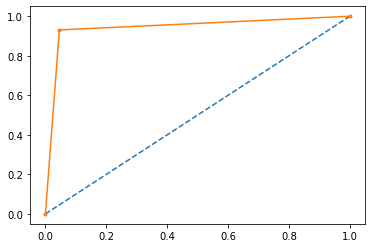

In [76]:
probs4 = modelKNN.predict_proba(features)
probs4 = probs4[:, 1]
auc = roc_auc_score(label, probs4)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(label, probs4)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

Minimum error:- 0.20253164556962025 at K = 1


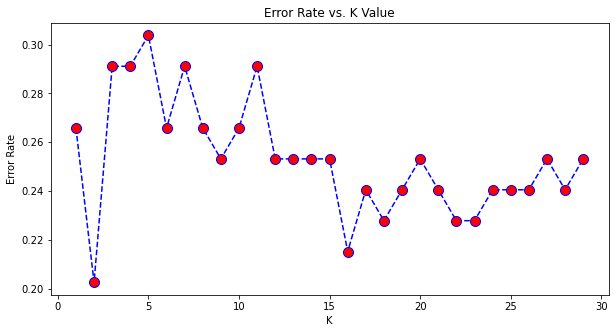

In [77]:
error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7974683544303798 at K = 1


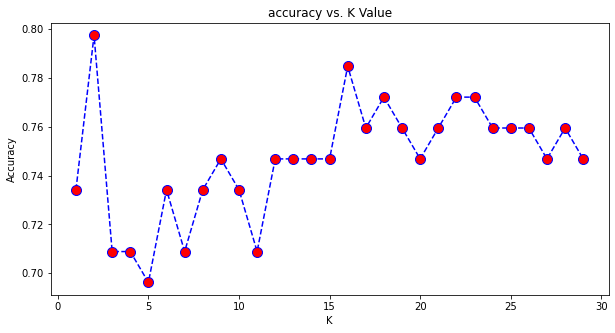

In [78]:
acc = []
from sklearn import metrics
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,5))
plt.plot(range(1,30),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))